<a href="https://colab.research.google.com/github/GSBK123/startup-profit-model/blob/main/CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0 0 1 1 0 1]


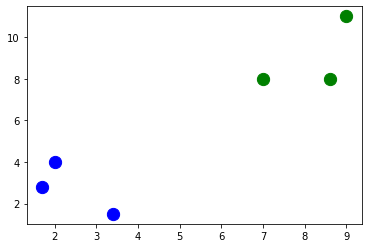

In [ ]:

# Online Python - IDE, Editor, Compiler, Interpreter

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style


class KMeans:
    def __init__(self, k=2, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
        
        for i in range(self.max_iter):
            clusters = [[] for _ in range(self.k)]
            
            for x in X:
                distances = [np.linalg.norm(x - c) for c in self.centroids]
                cluster_idx = np.argmin(distances)
                clusters[cluster_idx].append(x)
            
            prev_centroids = self.centroids.copy()
            
            for j, cluster in enumerate(clusters):
                if len(cluster) > 0:
                    self.centroids[j] = np.mean(cluster, axis=0)
                    
            if np.allclose(prev_centroids, self.centroids):
                break
                
    def predict(self, X):
        distances = np.zeros((len(X), self.k))
        for i, x in enumerate(X):
            distances[i] = [np.linalg.norm(x - c) for c in self.centroids]
        return np.argmin(distances, axis=1)


X = np.array([[2, 4],
              [1.7, 2.8],
              [7, 8],
              [8.6, 8],
              [3.4, 1.5],
              [9, 11]])

kmeans = KMeans(k=2, max_iter=100)
kmeans.fit(X)

print(kmeans.predict(X))

colors = ['b', 'g']

fig, ax = plt.subplots()

for i in range(kmeans.k):
    points = np.array([X[j] for j in range(len(X)) if kmeans.predict(X)[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=150, c=colors[i])


